In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize
import plotly.express as px
import plotly.graph_objects as go
import math
from IPython.display import display, Markdown, HTML
import warnings
warnings.filterwarnings('ignore')

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Sample document collection
documents = [
    "Machine learning is a subset of artificial intelligence",
    "Natural language processing deals with interactions between computers and human language",
    "Deep learning uses neural networks with many layers",
    "Information retrieval is finding relevant documents for a query",
    "Machine learning algorithms learn from data",
    "Neural networks are inspired by the human brain",
    "Vector space models represent documents as vectors",
    "TF-IDF weighs terms based on their frequency and uniqueness",
    "Cosine similarity measures the angle between vectors",
    "Dimensionality reduction techniques compress vector representations"
]

# Assign document IDs
doc_ids = [f"doc_{i}" for i in range(len(documents))]
corpus = dict(zip(doc_ids, documents))

print("Document Collection:")
for doc_id, content in corpus.items():
    print(f"{doc_id}: {content}")

Document Collection:
doc_0: Machine learning is a subset of artificial intelligence
doc_1: Natural language processing deals with interactions between computers and human language
doc_2: Deep learning uses neural networks with many layers
doc_3: Information retrieval is finding relevant documents for a query
doc_4: Machine learning algorithms learn from data
doc_5: Neural networks are inspired by the human brain
doc_6: Vector space models represent documents as vectors
doc_7: TF-IDF weighs terms based on their frequency and uniqueness
doc_8: Cosine similarity measures the angle between vectors
doc_9: Dimensionality reduction techniques compress vector representations


In [ ]:
def preprocess_text(text, remove_stopwords=True, stemming=False, lemmatization=True):
    """
    Preprocess text by performing the following operations:
    1. Convert to lowercase
    2. Remove special characters and numbers
    3. Tokenize
    4. Remove stopwords (optional)
    5. Apply stemming or lemmatization (optional)

    Args:
        text: Input text to preprocess
        remove_stopwords: Whether to remove stopwords
        stemming: Whether to apply stemming
        lemmatization: Whether to apply lemmatization

    Returns:
        processed_text: Preprocessed text as a string of tokens
    """
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]

    # Apply stemming
    if stemming:
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(token) for token in tokens]

    # Apply lemmatization
    if lemmatization:
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens back into a string
    processed_text = ' '.join(tokens)

    return processed_text

# Preprocess the document collection
preprocessed_corpus = {doc_id: preprocess_text(text) for doc_id, text in corpus.items()}

print("Preprocessed Document Collection:")
for doc_id, content in preprocessed_corpus.items():
    print(f"{doc_id}: {content}")

Preprocessed Document Collection:
doc_0: machine learning subset artificial intelligence
doc_1: natural language processing deal interaction computer human language
doc_2: deep learning us neural network many layer
doc_3: information retrieval finding relevant document query
doc_4: machine learning algorithm learn data
doc_5: neural network inspired human brain
doc_6: vector space model represent document vector
doc_7: tfidf weighs term based frequency uniqueness
doc_8: cosine similarity measure angle vector
doc_9: dimensionality reduction technique compress vector representation


Advanced Techniques: Word Embeddings

Word embeddings provide dense vector representations of words that capture semantic meaning. Let's explore how to use them for information retrieval.

### Word2Vec

Word2Vec is a technique that uses neural networks to learn word associations from a large corpus of text. Let's implement a simple Word2Vec model:

In [ ]:
!pip install gensim

Word2Vec Document Similarity Matrix:


,doc_0,doc_1,doc_2,doc_3,doc_4,doc_5,doc_6,doc_7,doc_8,doc_9
doc_0,1.000000,-0.108382,0.164642,-0.006860,0.451735,0.113109,0.033318,-0.130723,0.091186,-0.014364
doc_1,-0.108382,1.000000,0.013428,0.028896,0.069213,0.236753,0.008685,-0.060663,0.004809,-0.009301
doc_2,0.164642,0.013428,1.000000,0.048126,0.109130,0.299921,-0.121979,-0.059479,-0.061314,-0.120219
doc_3,-0.006860,0.028896,0.048126,1.000000,0.100104,-0.053751,0.086681,-0.001772,-0.120615,-0.008601
doc_4,0.451735,0.069213,0.109130,0.100104,1.000000,-0.073894,-0.001481,-0.026080,0.000424,0.015559
doc_5,0.113109,0.236753,0.299921,-0.053751,-0.073894,1.000000,0.078399,-0.083934,0.172395,-0.079294
doc_6,0.033318,0.008685,-0.121979,0.086681,-0.001481,0.078399,1.000000,-0.027958,0.366407,0.500076
doc_7,-0.130723,-0.060663,-0.059479,-0.001772,-0.026080,-0.083934,-0.027958,1.000000,-0.051955,-0.079699
doc_8,0.091186,0.004809,-0.061314,-0.120615,0.000424,0.172395,0.366407,-0.051955,1.000000,0.275190
doc_9,-0.014364,-0.009301,-0.120219,-0.008601,0.015559,-0.079294,0.500076,-0.079699,0.275190,1.000000


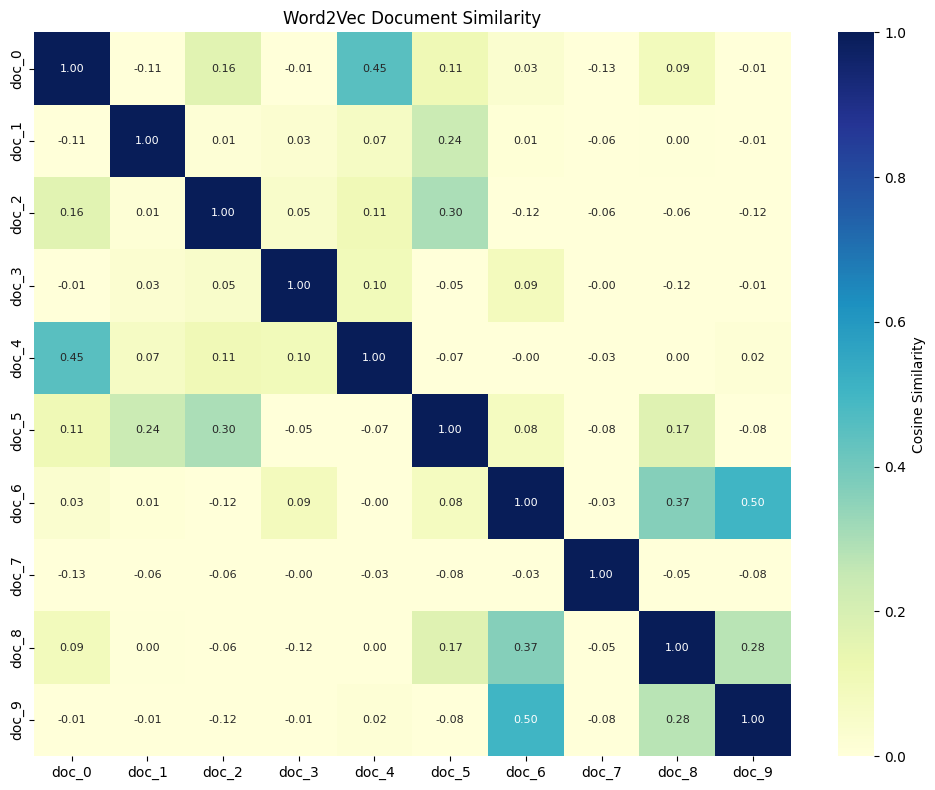

In [ ]:
from gensim.models import Word2Vec
# Prepare data for Word2Vec
tokenized_corpus = [preprocessed_doc.split() for preprocessed_doc in preprocessed_corpus.values()]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

# Function to get document embeddings by averaging word vectors
def get_doc_embedding(doc, model):
    """
    Get document embedding by averaging word vectors.

    Args:
        doc: Preprocessed document as a string
        model: Word2Vec model

    Returns:
        Document embedding vector
    """
    words = doc.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]

    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)

    # Average word vectors
    return np.mean(word_vectors, axis=0)

# Get document embeddings
doc_embeddings = np.array([get_doc_embedding(preprocessed_corpus[doc_id], word2vec_model) for doc_id in doc_ids])

# Compute cosine similarity between document embeddings
w2v_cosine_sim = cosine_similarity(doc_embeddings)

# Create a DataFrame for better visualization
w2v_cosine_sim_df = pd.DataFrame(w2v_cosine_sim, index=doc_ids, columns=doc_ids)

print("Word2Vec Document Similarity Matrix:")
display(w2v_cosine_sim_df)

# Visualize the Word2Vec cosine similarity matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(w2v_cosine_sim_df, annot=True, cmap="YlGnBu", vmin=0, vmax=1,
            annot_kws={"size": 8}, fmt=".2f", cbar_kws={'label': 'Cosine Similarity'})
plt.title("Word2Vec Document Similarity")
plt.tight_layout()
plt.show()

## Try It Yourself
Try to impelement a simple information retrieval system that uses Word2Vec embeddings.
Note: You can use the code from the previous notebook - information retrieval system based on TF-IDF \& cosine similarity - as the starting point.